### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pandas as _pd
import glob as _gl
import pymad8 as _m8
import pybdsim as _bd
import beamTracking
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

Welcome to JupyROOT 6.26/04


### Date and prefix

In [2]:
date = "2023_01_26"
save_name_prefix = "plots/BeamTracking/" + date + "_T20_plot"

# Track Class Definition

In [3]:
paramdict = {'x' : {'mean': 0, 'std': 10e-6}, #10e-6
             'xp': {'mean': 0, 'std': 10e-6}, #10e-6
             'y' : {'mean': 0, 'std': 10e-6}, #10e-6
             'yp': {'mean': 0, 'std': 10e-6}, #10e-6
             'z' : {'mean': 0, 'std': 30e-6}, #30e-6
             'DE': {'mean': 0, 'std': 3e-3},  #3e-3
            }

In [4]:
Track_Collection = beamTracking.setTrackCollection(10000, 14, paramdict,'../01_mad8/track_input_mad8','../03_bdsimModel/track_input_bdsim')
Track = beamTracking.setSamplersAndTrack("../01_mad8/TWISS_CL_T20", "../01_mad8/RMAT_CL_T20")
Track.RunPymad8Tracking(Track_Collection)

Mad8.readTwissFile > nrec=878
Mad8.readRmatFile > nrec=878
Mad8.tracking > 10000 particles and 878 samplers


In [5]:
# _bd.Run.Bdsim("../03_bdsimModel/T20_dens_1e-12.gmad", "../04_dataLocal/TEST_T20_with_userfile")
STOP

NameError: name 'STOP' is not defined

### BDSIM loading

In [6]:
Track.LoadBdsimTrack("../04_dataLocal/T20_no_bias_for_tracking.root")

BDSIM output file - using DataLoader
Loading file ../04_dataLocal/T20_no_bias_for_tracking.root. Track 10000 particles at 792 samplers: |██████████████████████████████████████████████████| 100.0% Complete


# TRAJECTORIES

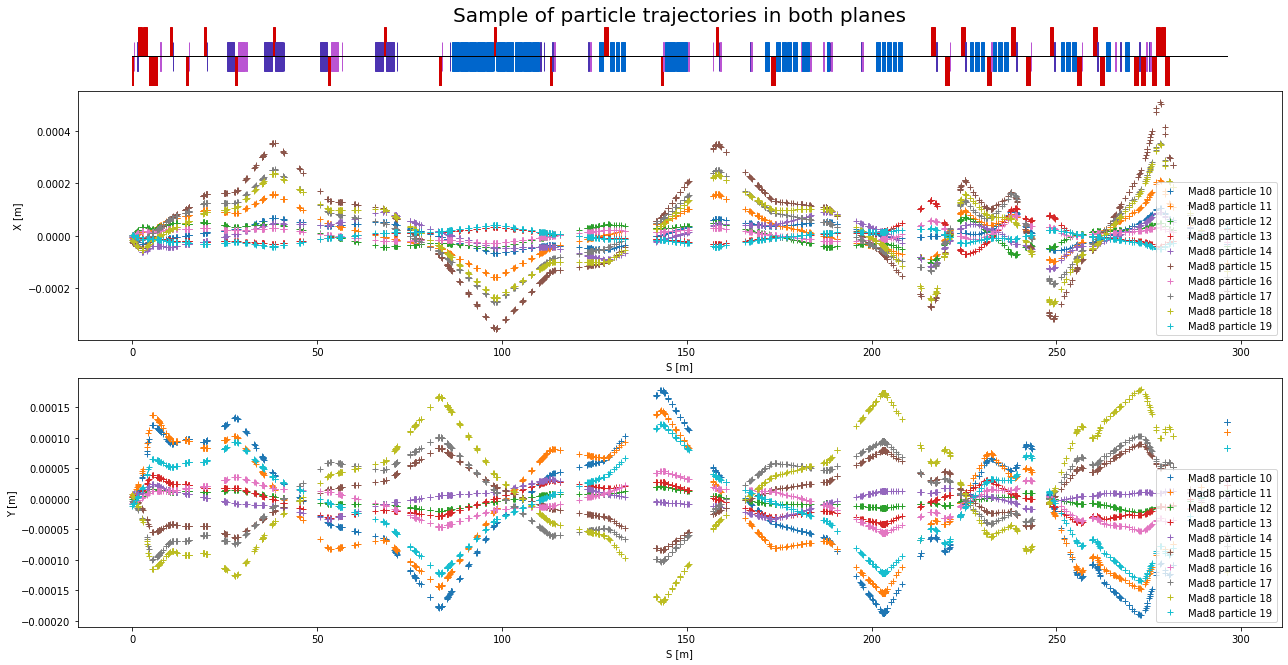

In [7]:
particle_number = 19

_plt.figure(figsize=(18, 9))

_plt.subplot(2, 1, 1)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'X')

_plt.subplot(2, 1, 2)
for particle_number in range(10,20):
    Track.PlotTrajectory(particle_number, 'Y')
    
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Sample of particle trajectories in both planes", fontsize=20)
_plt.savefig("{}_Multiple_Particle_trajectories_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

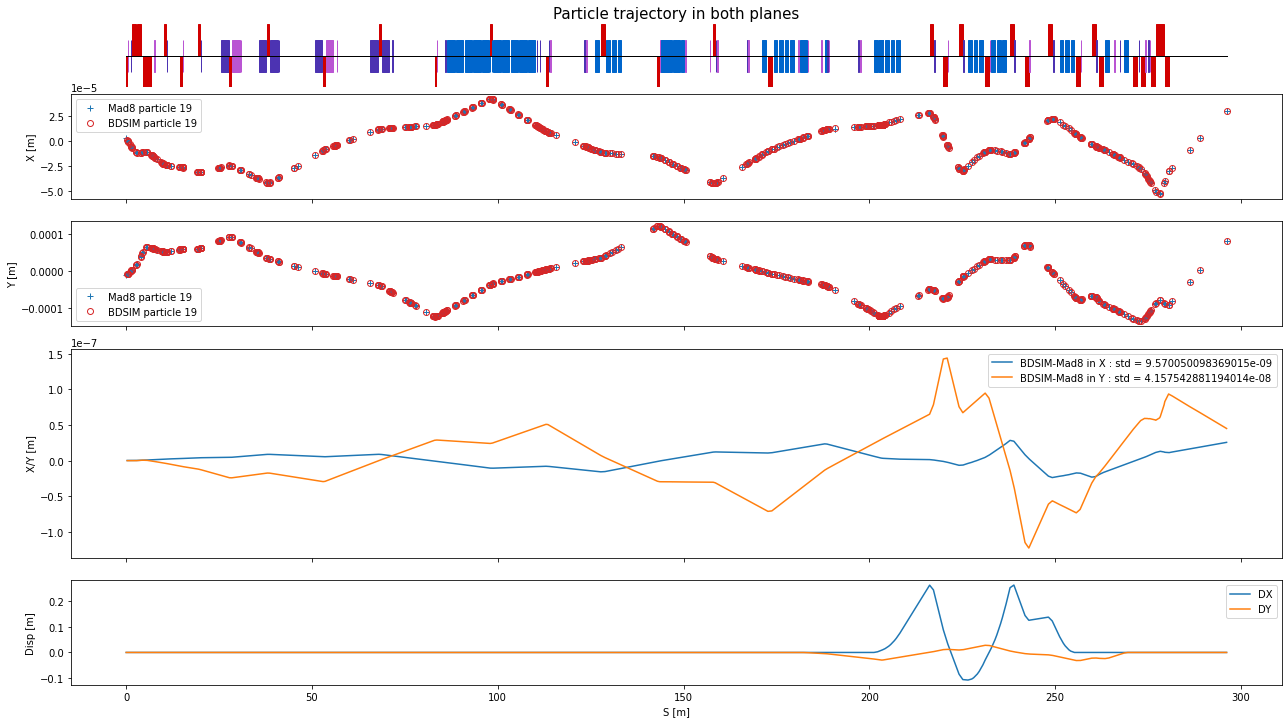

In [8]:
particle_number = 19

#_plt.figure(figsize=(14, 15))
fig, ax = _plt.subplots(4,1,figsize=(18,10), gridspec_kw={'height_ratios': [1, 1, 2, 1]}, sharex='all')

_plt.subplot(4, 1, 1)
Track.PlotTrajectory(particle_number, 'X', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 2)
Track.PlotTrajectory(particle_number, 'Y', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 3)
Track.PlotRelatTrajectory(particle_number, 'X')
Track.PlotRelatTrajectory(particle_number, 'Y')
_plt.xlabel(None)
#_plt.ylim([-1e-10,6e-10])

if True:
    _plt.subplot(4, 1, 4)
    Track.twiss.plotXY('S', 'DX')
    Track.twiss.plotXY('S', 'DY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp [m]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle trajectory in both planes", fontsize=15)

#_plt.xlim([150,230])

_plt.savefig("{}_Particle_trajectory_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

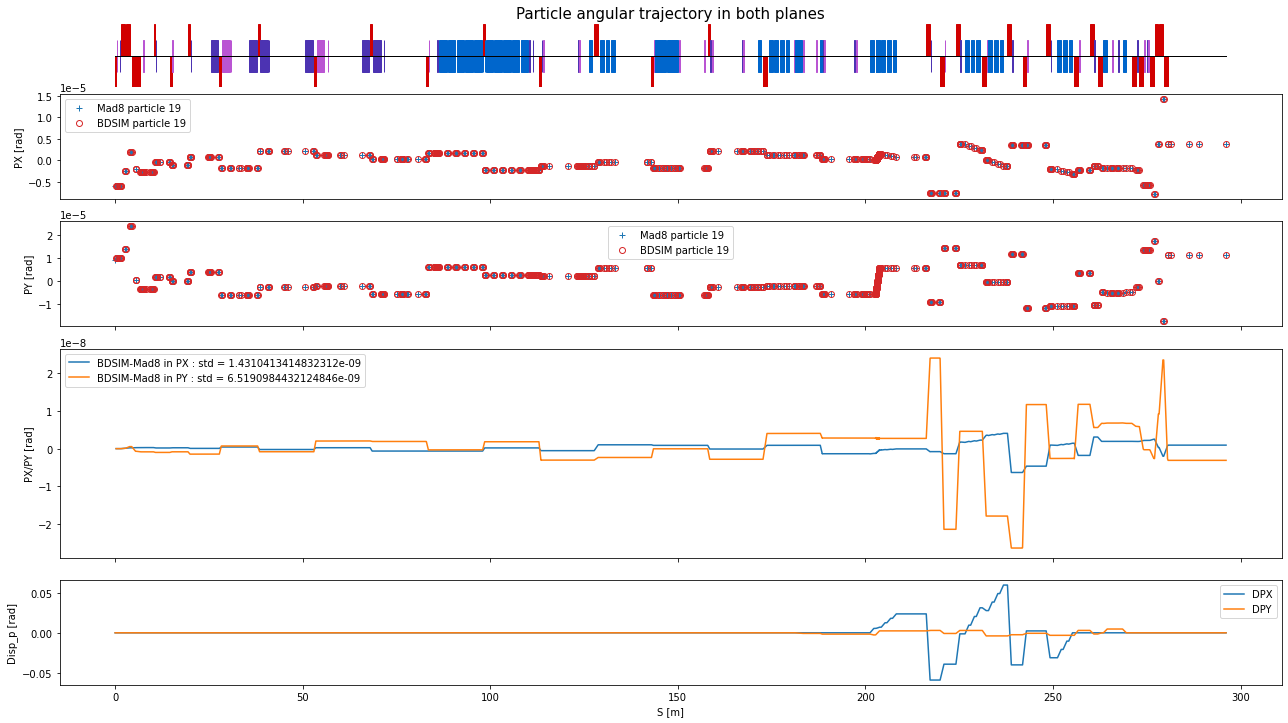

In [9]:
#_plt.figure(figsize=(14, 9))
fig, ax = _plt.subplots(4,1,figsize=(18,10), gridspec_kw={'height_ratios': [1, 1, 2, 1]}, sharex='all')

_plt.subplot(4, 1, 1)
Track.PlotTrajectory(particle_number, 'PX', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 2)
Track.PlotTrajectory(particle_number, 'PY', bdsimCompare=True)
_plt.xlabel(None)

_plt.subplot(4, 1, 3)
Track.PlotRelatTrajectory(particle_number, 'PX')
Track.PlotRelatTrajectory(particle_number, 'PY')
_plt.xlabel(None)

if True :
    _plt.subplot(4, 1, 4)
    Track.twiss.plotXY('S', 'DPX')
    Track.twiss.plotXY('S', 'DPY')
    _plt.xlabel('S [m]')
    _plt.ylabel('Disp_p [rad]')
    _plt.legend()

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Particle angular trajectory in both planes", fontsize=15)

_plt.savefig("{}_Particle_trajectory_derivate_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

Sampler QF.1.TL at position S = 68.50605 m


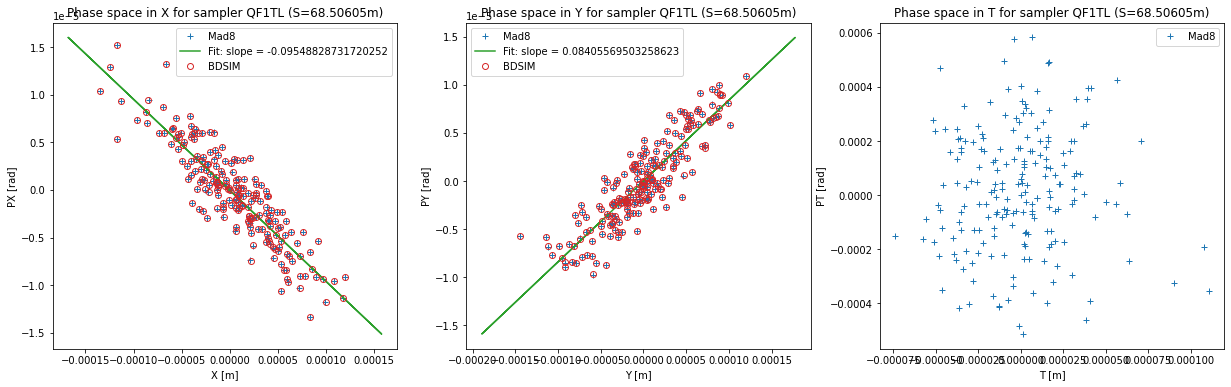

In [10]:
S=68.5
sampler_name = Track.twiss.getNameByNearestS(S)
sampler_S = Track.twiss.getRowByNearestS(S)['S'].tolist()[0]
print("Sampler {} at position S = {} m".format(sampler_name, sampler_S))

_plt.figure(figsize=(21, 6))

_plt.subplot(1, 3, 1)
Track.PlotPhaseSpace(S, 'X', linFit=True, bdsimCompare=True)

_plt.subplot(1, 3, 2)
Track.PlotPhaseSpace(S, 'Y', linFit=True, bdsimCompare=True)

_plt.subplot(1, 3, 3)
Track.PlotPhaseSpace(S, 'T')

_plt.savefig("{}_Phase_space_at_one_sampler_in_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

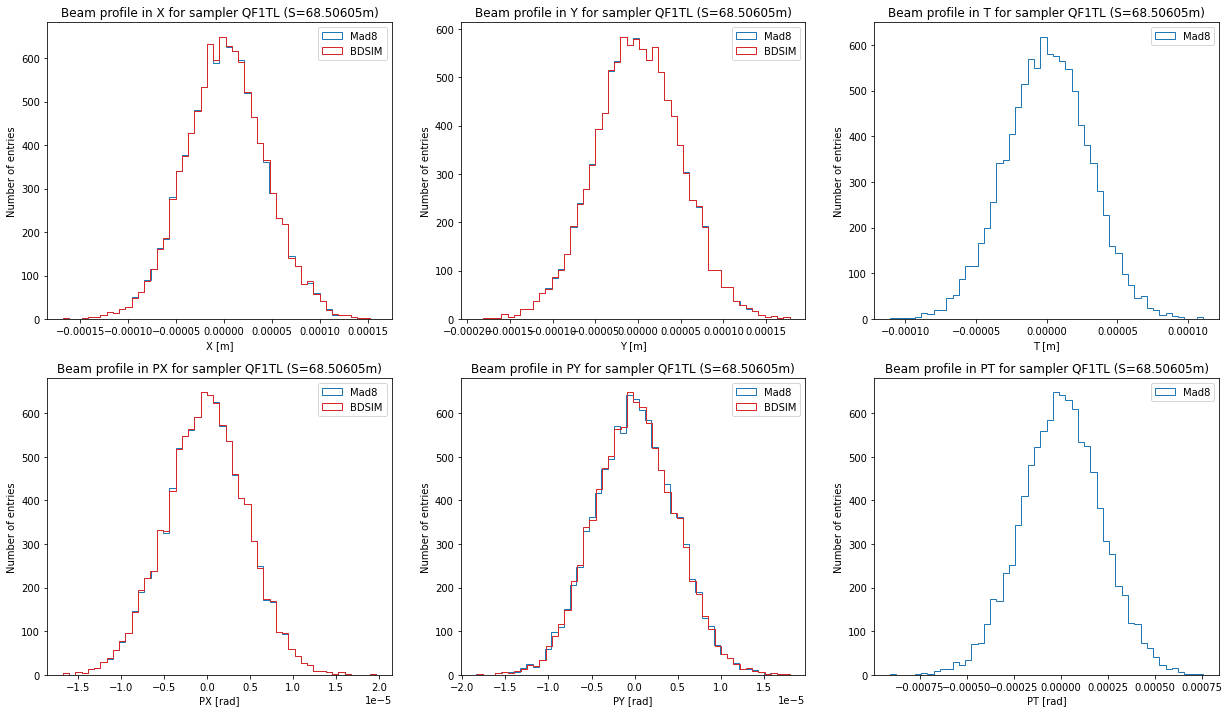

In [11]:
_plt.figure(figsize=(21, 12))

_plt.subplot(2, 3, 1)
Track.PlotHist(S, 'X', bdsimCompare=True)

_plt.subplot(2, 3, 2)
Track.PlotHist(S, 'Y', bdsimCompare=True)

_plt.subplot(2, 3, 3)
Track.PlotHist(S, 'T')

_plt.subplot(2, 3, 4)
Track.PlotHist(S, 'PX', bdsimCompare=True)

_plt.subplot(2, 3, 5)
Track.PlotHist(S, 'PY', bdsimCompare=True)

_plt.subplot(2, 3, 6)
Track.PlotHist(S, 'PT')


_plt.savefig("{}_Beam_profile_at_one_sampler_in_all_coordinates".format(save_name_prefix), dpi=300, bbox_inches='tight')

 # CORRELATION


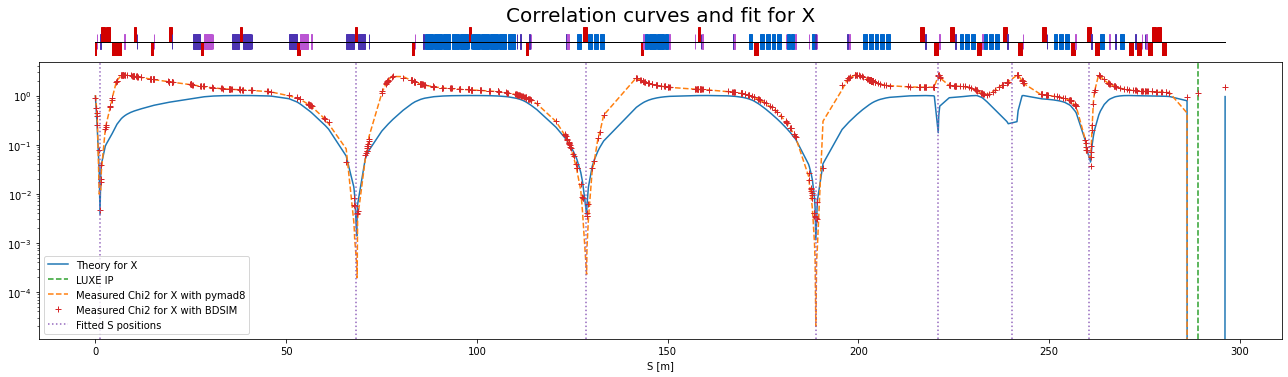

In [12]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
initial_fit = [[1, 70, 130, 180, 220, 240, 260],
              [40, 100, 160, 215, 230, 245, 270],
              [1, 50, 100, 175, 225, 250],
              [25, 100, 150, 200, 225, 240, 265]]

_plt.figure(figsize=(18, 5))

beamTracking.PlotTheoryFitAndChi2(Track, 'X', ref_S, 'X',  initial_fit[0], bdsimCompare=True)

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Correlation curves and fit for X", fontsize=20)
_plt.savefig("{}_Correlation_curves_and_fit_for_X".format(save_name_prefix), dpi=300, bbox_inches='tight')

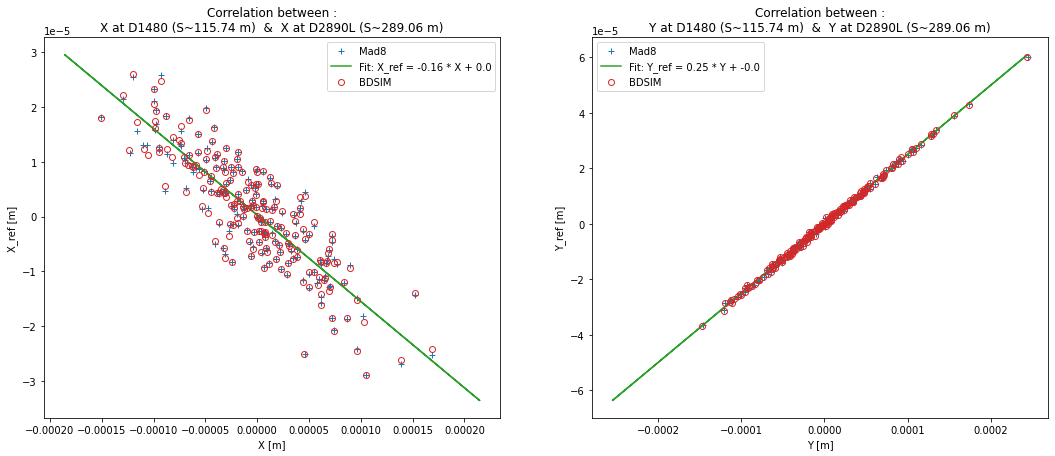

In [13]:
S = 117
ref_S = Track.pymad8.getSBySamplers('D2890L')

_plt.figure(figsize=(18, 7))

_plt.subplot(1, 2, 1)
Track.PlotCorrelation(S, 'X', ref_S, 'X', linFit=True, bdsimCompare=True)

_plt.subplot(1, 2, 2)
Track.PlotCorrelation(S, 'Y', ref_S, 'Y', linFit=True, bdsimCompare=True)

#_plt.subplot(2, 2, 2)
#Track.PlotCorrelation(index, 'X', ref_index, 'Y')

#_plt.subplot(2, 2, 3)
#Track.PlotCorrelation(index, 'X', ref_index, 'PX')

#_plt.subplot(2, 2, 4)
#Track.PlotCorrelation(index, 'X', ref_index, 'PY')


_plt.savefig("{}_Beam_profile_at_one_sampler_compared_to_IP_in_all_coordinates".format(save_name_prefix), dpi=300, bbox_inches='tight')

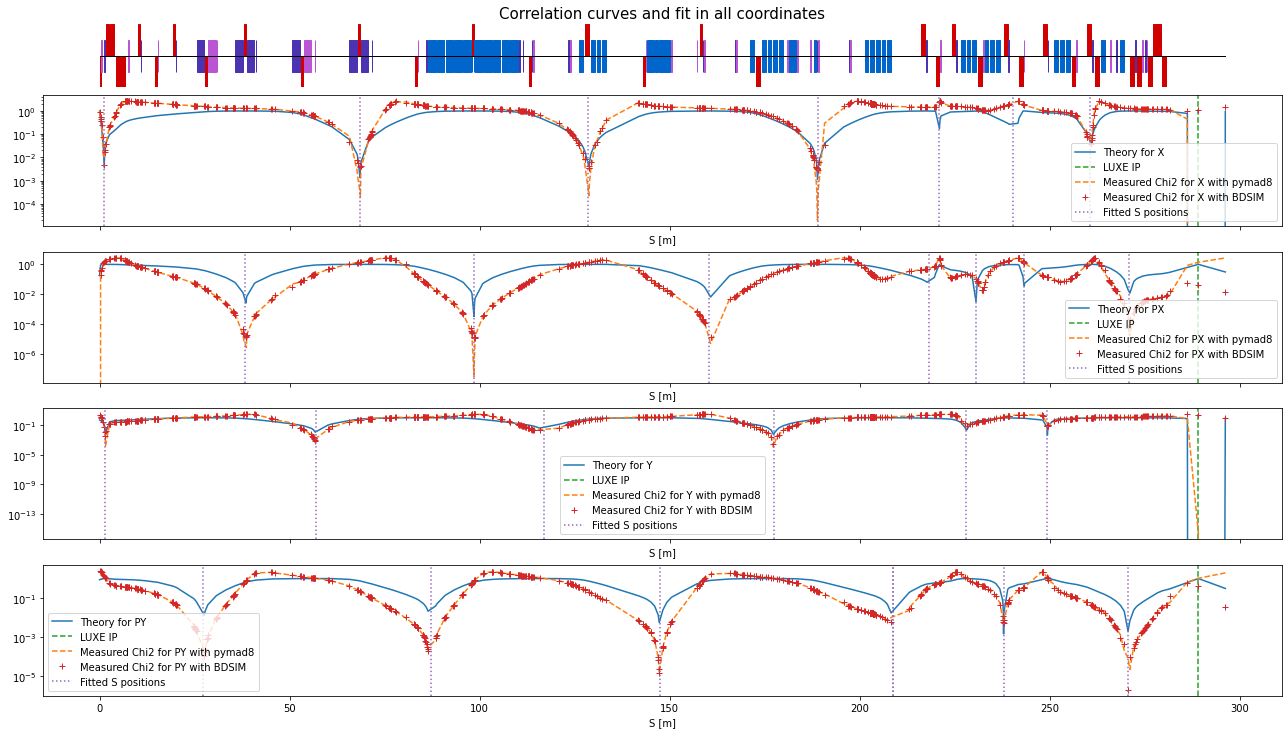

In [14]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
initial_fit = [[1, 70, 130, 180, 220, 240, 260],
              [40, 100, 160, 215, 230, 245, 270],
              [1, 50, 100, 175, 225, 250],
              [25, 100, 150, 200, 225, 240, 265]]

fig, ax = _plt.subplots(4, 1, figsize=(18, 10), gridspec_kw={'height_ratios': [1, 1, 1, 1]}, sharex='all')

_plt.subplot(4, 1, 1)
beamTracking.PlotTheoryFitAndChi2(Track, 'X', ref_S, 'X',  initial_fit[0], bdsimCompare=True)
_plt.subplot(4, 1, 2)
beamTracking.PlotTheoryFitAndChi2(Track, 'X', ref_S, 'PX', initial_fit[1], bdsimCompare=True)
_plt.subplot(4, 1, 3)
beamTracking.PlotTheoryFitAndChi2(Track, 'Y', ref_S, 'Y',  initial_fit[2], bdsimCompare=True)
_plt.subplot(4, 1, 4)
beamTracking.PlotTheoryFitAndChi2(Track, 'Y', ref_S, 'PY', initial_fit[3], bdsimCompare=True)

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Correlation curves and fit in all coordinates", fontsize=15)
_plt.savefig("{}_Correlation_curves_and_fit_in_all_coordinates".format(save_name_prefix), dpi=300, bbox_inches='tight')

### Phase space

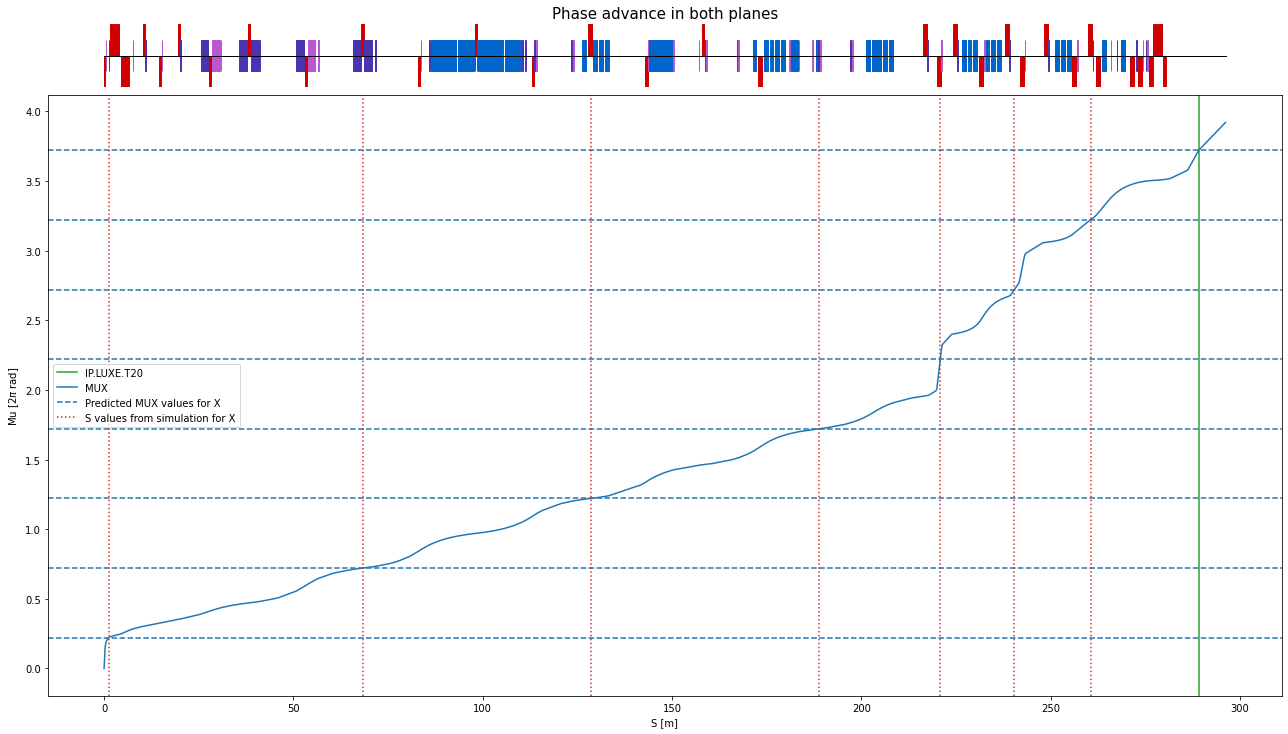

In [15]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
initial_fit = [[1, 70, 130, 180, 220, 240, 260],
              [40, 100, 160, 215, 230, 245, 270],
              [1, 50, 100, 175, 225, 250],
              [25, 100, 150, 200, 225, 240, 265]]
S_list = Track.getTheoryAndFit('X', ref_S, 'X', initial_fit[0])[1]

_plt.figure(figsize=(18, 10))
beamTracking.PlotPhaseAdvanceCheck(Track, 'X', S_list)
_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("Phase advance in both planes", fontsize=15)
_plt.savefig("{}_Phase_advance_in_both_planes".format(save_name_prefix), dpi=300, bbox_inches='tight')

## SINGULAR VALUE DECOMPOSITION

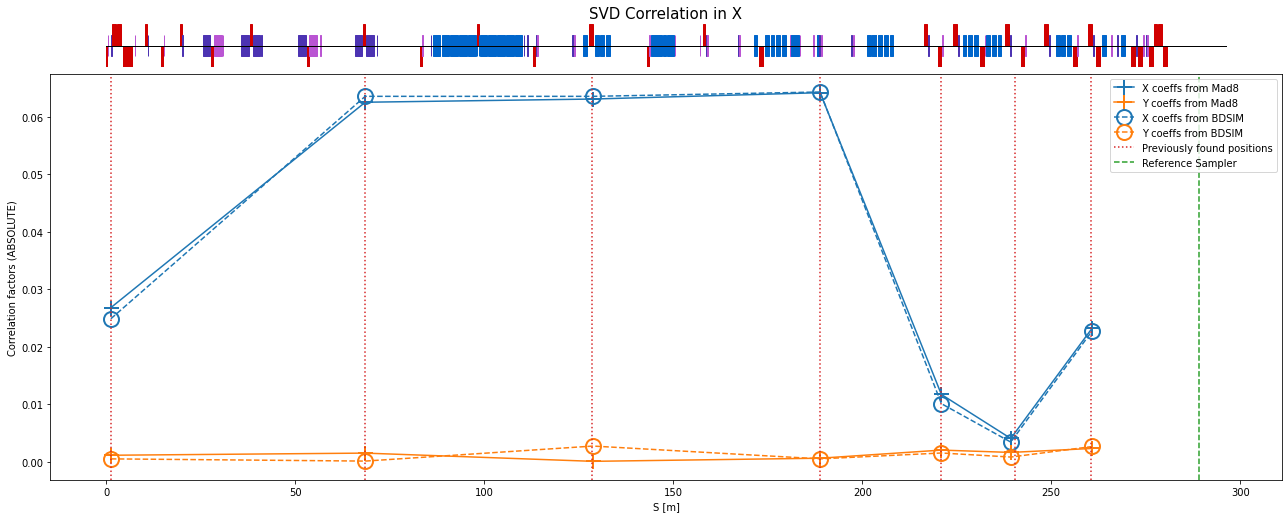

In [16]:
_plt.figure(figsize=(18,7))
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
#BPM_list=['QUAD']
BPM_list=['QUAD','HKIC','VKIC']
S_dict = {'X': Track.getTheoryAndFit('X', ref_S, 'X', initial_fit[0])[1],
          'PX': Track.getTheoryAndFit('X', ref_S, 'PX', initial_fit[1])[1],
          'Y': Track.getTheoryAndFit('Y', ref_S, 'Y', initial_fit[2])[1],
          'PY': Track.getTheoryAndFit('Y', ref_S, 'PY', initial_fit[3])[1]}

#beamTracking.PlotSVDCoeff(Track, ref_S, predicted_S_list=S_dict['X'], plotRef=True)
#beamTracking.PlotSVDCoeff(Track, ref_S, BPM_list=BPM_list, BPM_list_type='type', s_range=[0,275], noise=10e-6, predicted_S_list=S_dict['X'])
#beamTracking.PlotSVDCoeff(Track, ref_S, BPM_list=BPM_list, BPM_list_type='type', s_range=[0,20], noise=1e-8, predicted_S_list=S_dictt['X'])


#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[0.1,20], predicted_S_list=S_dict['X'])
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[50,200], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='X', BPM_list=BPM_list, BPM_list_type='type', s_range=[200,275], printLabels=False)

#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[25,75], predicted_S_list=S_dict['PX'])
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[75,175], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[190,250], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PX', BPM_list=BPM_list, BPM_list_type='type', s_range=[250,280], printLabels=False)

#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[0.1,15], predicted_S_list=S_dict['Y'])
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[30,200], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='Y', BPM_list=BPM_list, BPM_list_type='type', s_range=[220,270], printLabels=False)

#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[10,50], predicted_S_list=S_dict['PY'])
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[50,175], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[180,250], printLabels=False)
#beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='PY', BPM_list=BPM_list, BPM_list_type='type', s_range=[250,280], printLabels=False)


beamTracking.PlotSVDCoeff(Track, ref_S, ref_coord='X', BPM_list=S_dict['X'], mean_sub=False, noise=10e-6, predicted_S_list=S_dict['X'], bdsimCompare=True)

_m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), Track.twiss)
_plt.title("SVD Correlation in X", fontsize=15)
_plt.savefig("{}_SVD_Correlation_in_X".format(save_name_prefix), dpi=300, bbox_inches='tight')

## RESOLUTION

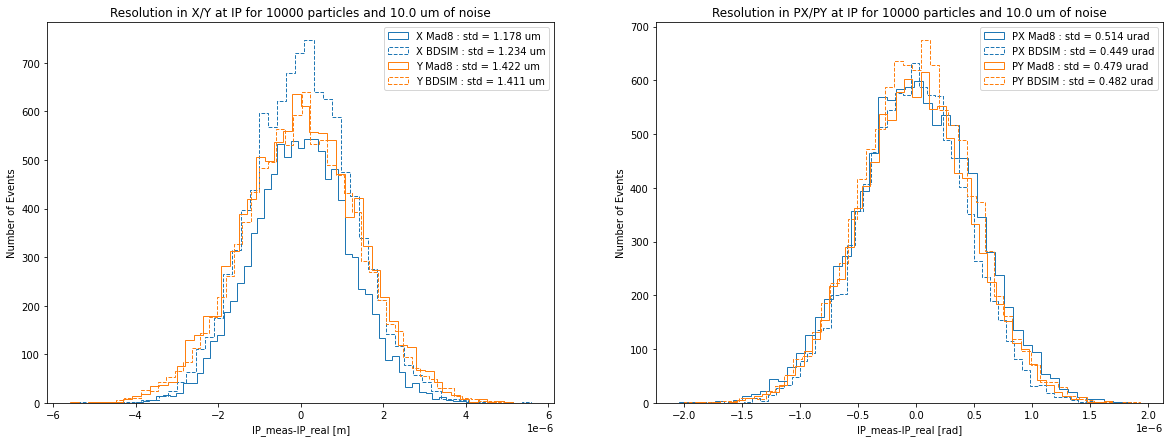

In [19]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
noise = 10e-6

_plt.figure(figsize = (20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResolution(Track, 'X', ref_S, S_dict, noise=noise, bdsimCompare=True)
beamTracking.PlotResolution(Track, 'Y', ref_S, S_dict, noise=noise, bdsimCompare=True)
_plt.title('Resolution in X/Y at IP for {} particles and {} um of noise'.format(len(Track.initial_dict),noise*1e6))

_plt.subplot(1, 2, 2)
beamTracking.PlotResolution(Track, 'PX', ref_S, S_dict, noise=noise, bdsimCompare=True)
beamTracking.PlotResolution(Track, 'PY', ref_S, S_dict, noise=noise, bdsimCompare=True)
_plt.title('Resolution in PX/PY at IP for {} particles and {} um of noise'.format(len(Track.initial_dict),noise*1e6))

_plt.savefig("{}_Resolution_at_the_IP_using_SVD".format(save_name_prefix), dpi=300, bbox_inches='tight')

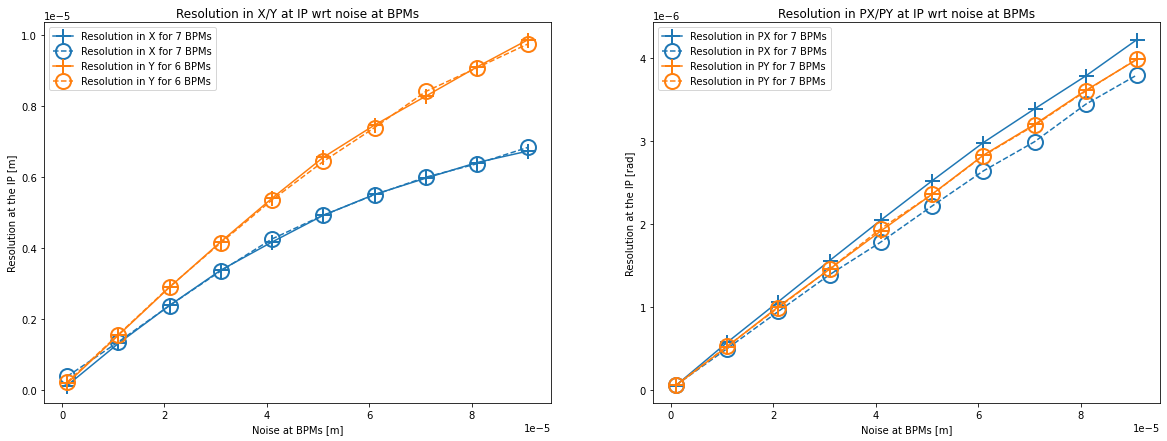

In [22]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
noise_range = _np.arange(1e-6,1e-4,10e-6)
_plt.figure(figsize = (20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResWrtBPMnoise(Track, 'X', ref_S, S_dict, noise_range, bdsimCompare=True)
beamTracking.PlotResWrtBPMnoise(Track, 'Y', ref_S, S_dict, noise_range, bdsimCompare=True)
_plt.title('Resolution in X/Y at IP wrt noise at BPMs')
_plt.subplot(1, 2, 2)
beamTracking.PlotResWrtBPMnoise(Track, 'PX', ref_S, S_dict, noise_range, bdsimCompare=True)
beamTracking.PlotResWrtBPMnoise(Track, 'PY', ref_S, S_dict, noise_range, bdsimCompare=True)
_plt.title('Resolution in PX/PY at IP wrt noise at BPMs')

_plt.savefig("{}_Resolution_at_the_IP_wrt_BPM_noise".format(save_name_prefix), dpi=300, bbox_inches='tight')

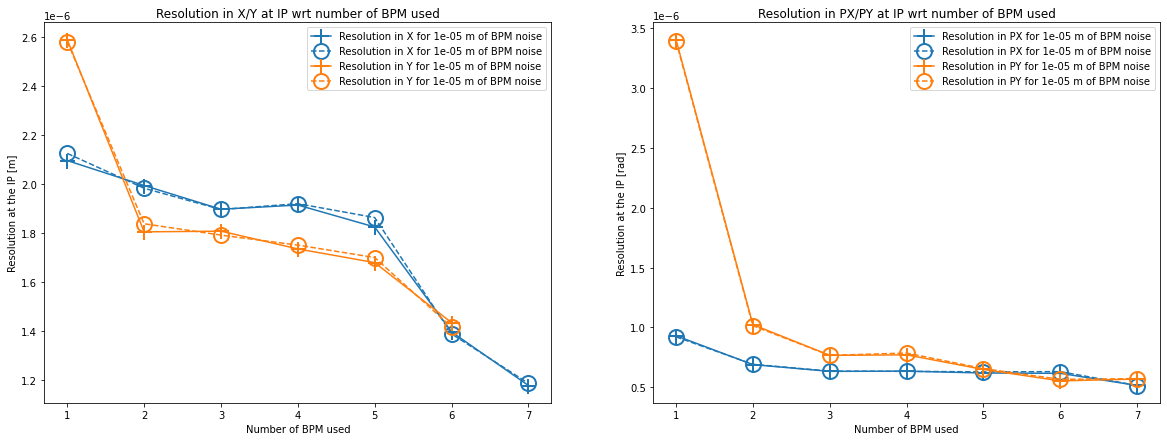

In [23]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
noise = 10e-6
sortcoeff = True
_plt.figure(figsize = (20,7))
_plt.subplot(1, 2, 1)
beamTracking.PlotResWrtNumberOfBPM(Track, 'X', ref_S, S_dict, noise=noise, sortcoeff=sortcoeff, bdsimCompare=True)
beamTracking.PlotResWrtNumberOfBPM(Track, 'Y', ref_S, S_dict, noise=noise, sortcoeff=sortcoeff, bdsimCompare=True)
_plt.title('Resolution in X/Y at IP wrt number of BPM used')
_plt.subplot(1, 2, 2)
beamTracking.PlotResWrtNumberOfBPM(Track, 'PX', ref_S, S_dict, noise=noise, sortcoeff=sortcoeff, bdsimCompare=True)
beamTracking.PlotResWrtNumberOfBPM(Track, 'PY', ref_S, S_dict, noise=noise, sortcoeff=sortcoeff, bdsimCompare=True)
_plt.title('Resolution in PX/PY at IP wrt number of BPM used')

_plt.savefig("{}_Resolution_at_the_IP_wrt_number_of_BPM".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [ ]:
L=3
E=1.158e-6
_np.arctan(_np.sqrt(2)*E/L)*1e6

In [ ]:
Track.twiss.data[(Track.twiss.data['NAME'].isin(['YQK.2.TL.T20','XQK.2.TL.T20']))]

In [ ]:
Track.twiss.data['K1'].unique()

In [ ]:
ref_S = Track.twiss.getElementByNames('IP.LUXE.T20', 'S')
ref_coord = 'X'
BPM_list = S_dict['X']
noise = 10e-6
s_range = [-_np.inf, _np.inf]

Res = Track.pymad8.CalcResolution(ref_coord, ref_S, S_dict[ref_coord], noise=noise)
A, B = _np.histogram(Res, bins=50)
print(len(A),len(B))

In [ ]:
Res